## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print ('we are using tensorflow version ',tf.__version__)

TensorFlow 2.x selected.
we are using tensorflow version  2.1.0


### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    8192/26421880 [..............................] - ETA: 0s

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
class_names = ['T-shirt', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle boot']
#class_names = []


###4. Find no.of samples in training and test dataset

In [0]:
print ('shape of training image data : ' ,x_train.shape )
print ('shape of training label data : ' ,y_train.shape )

shape of training image data :  (60000, 28, 28)
shape of training label data :  (60000,)


In [0]:
print ('shape of testing image data : ' ,x_test.shape )
print ('shape of testing label data : ' ,y_test.shape )


shape of testing image data :  (10000, 28, 28)
shape of testing label data :  (10000,)


###5. Find dimensions of an image in the dataset

In [0]:
print ('dimension of an image' , x_train.shape[1:3] )

dimension of an image (28, 28)


### 6. Verify if existing labels/Classes are correct 

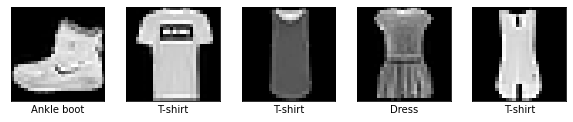

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    # plt.xlabel(y_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
trainy = tf.keras.utils.to_categorical(y_train)

In [0]:
testy = tf.keras.utils.to_categorical(y_test)

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_norm = x_train/255
x_test_norm = x_test/255

### 9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
x_train_reshaped =tf.keras.backend.expand_dims(x_train_norm,axis=-1)
x_test_reshaped = tf.keras.backend.expand_dims(x_test_norm,axis=-1)

In [0]:
type(x_train_reshaped)

tensorflow.python.framework.ops.EagerTensor

###10. Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import BatchNormalization



### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:

tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()


#Add first convolutional layer
model.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 input_shape=(28, 28, 1),
                                 activation='relu'))

#Add second convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

#Flatten the output
model.add(Flatten())

#Dense layer
model.add(Dense(128, activation='relu'))

#Output layer
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Train the model
model.fit(x_train_reshaped,trainy,          
          validation_data=(x_test_reshaped,testy),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.3748 - accuracy: 0.8647 - val_loss: 0.3198 - val_accuracy: 0.8801
Epoch 2/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2301 - accuracy: 0.9151 - val_loss: 0.2471 - val_accuracy: 0.9102
Epoch 3/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1644 - accuracy: 0.9372 - val_loss: 0.2510 - val_accuracy: 0.9124
Epoch 4/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1151 - accuracy: 0.9571 - val_loss: 0.2736 - val_accuracy: 0.9134
Epoch 5/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0748 - accuracy: 0.9717 - val_loss: 0.3190 - val_accuracy: 0.9123
Epoch 6/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0517 - accuracy: 0.9813 - val_loss: 0.3655 - val_accuracy: 0.9107
Epoch 7/10
60000/60000 [==========================

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model2 = tf.keras.models.Sequential()


#Reshape data from 2D (28,28) to 3D (28, 28, 1)
# model2.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
# model2.add(tf.keras.layers.BatchNormalization())

#Add first convolutional layer
model2.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 input_shape=(28, 28, 1),
                                 activation='relu'))

#Add second convolutional layer
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))


#Add MaxPooling layer
model2.add(MaxPool2D(pool_size=(2,2)))
#Flatten the output
model2.add(Flatten())

#Dense layer
model2.add(Dense(128, activation='relu'))

#Add another dropout layer
model2.add(Dropout(0.25))

#Output layer
model2.add(Dense(10, activation='softmax'))

###13. Verify accuracy of the model

> 

In [0]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [0]:
#Train the model
model2.fit(x_train_reshaped,trainy,          
          validation_data=(x_test_reshaped,testy),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.4157 - accuracy: 0.8506 - val_loss: 0.2877 - val_accuracy: 0.8947
Epoch 2/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.2728 - accuracy: 0.9008 - val_loss: 0.2619 - val_accuracy: 0.9034
Epoch 3/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2274 - accuracy: 0.9163 - val_loss: 0.2415 - val_accuracy: 0.9102
Epoch 4/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1929 - accuracy: 0.9281 - val_loss: 0.2445 - val_accuracy: 0.9149
Epoch 5/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.1652 - accuracy: 0.9387 - val_loss: 0.2302 - val_accuracy: 0.9203
Epoch 6/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1428 - accuracy: 0.9458 - val_loss: 0.2292 - val_accuracy: 0.9252
Epoch 7/10
60000/60000 [==========================

####14. Verify performance of your model selectively 

In [0]:
predictions = model2.predict(x_train_reshaped)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

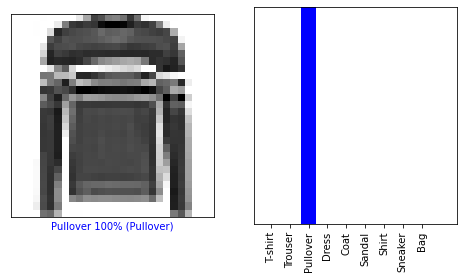

In [0]:
import numpy as np
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(width_shift_range=0.2, horizontal_flip=True, vertical_flip=True,rotation_range=5)
#Various parameters can be applied

In [0]:
datagen.fit(x_test_reshaped)

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

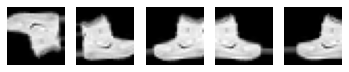

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_reshaped[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()